# Lab 4

## Import libs

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats
import statsmodels.api as sm

## Read data

In [2]:
df = pd.read_excel('/Users/dkravchenko/Jupyter_Notebookes/MathStat/lab4/data.xlsx')
df.head(10)

,Height(Inches),Weight(Pounds)
0,70.05146,134.6655
1,67.30497,122.0232
2,66.39813,128.3502
3,69.73637,130.6354
4,68.71659,131.7170
5,63.88437,108.6132
6,68.40851,114.5673
7,67.93251,133.5136
8,70.69674,135.8641
9,68.95083,148.1093


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  200 non-null    float64
 1   Weight(Pounds)  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
df['Height(Inches)'].describe()

count    200.000000
mean      67.912966
std        1.912926
min       62.750390
25%       66.699990
50%       68.001210
75%       69.191198
max       74.248990
Name: Height(Inches), dtype: float64

In [5]:
df['Weight(Pounds)'].describe()

count    200.000000
mean     127.539174
std       10.902359
min       98.302620
25%      119.479600
50%      129.038000
75%      134.949775
max      160.883100
Name: Weight(Pounds), dtype: float64

### Correlation cloud

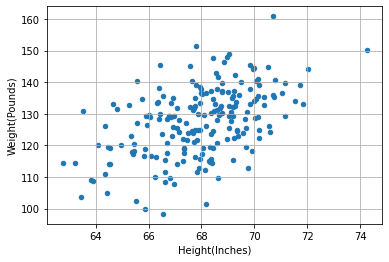

In [6]:
xs = df['Height(Inches)']
ys = df['Weight(Pounds)']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, grid=True)
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.show()

### Correlation tables

In [7]:
heigth = df['Height(Inches)'].sort_values()
weigth = df['Weight(Pounds)'].sort_values()

matrix_df = df.copy()

cut_H = pd.cut(heigth, bins=7)
cut_W = pd.cut(weigth, bins=7)

matrix_df['cut_H'] = cut_H
matrix_df['cut_W'] = cut_W

display(matrix_df.head())

,Height(Inches),Weight(Pounds),cut_H,cut_W
0,70.05146,134.6655,"(69.321, 70.964]","(134.063, 143.003]"
1,67.30497,122.0232,"(66.036, 67.678]","(116.183, 125.123]"
2,66.39813,128.3502,"(66.036, 67.678]","(125.123, 134.063]"
3,69.73637,130.6354,"(69.321, 70.964]","(125.123, 134.063]"
4,68.71659,131.7170,"(67.678, 69.321]","(125.123, 134.063]"


In [8]:
CorrTable_df = pd.crosstab(
    index=matrix_df['cut_H'],
    columns=matrix_df['cut_W'],
    rownames=['cut_H'],
    colnames=['cut_W'])

display(CorrTable_df)

print(f"sum = {np.sum(np.array(CorrTable_df))}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",1,5,1,2,0,0,0
"(64.393, 66.036]",3,2,10,7,2,0,0
"(66.036, 67.678]",1,8,14,17,4,2,0
"(67.678, 69.321]",1,10,16,25,20,5,0
"(69.321, 70.964]",0,1,9,8,13,4,1
"(70.964, 72.606]",0,0,0,3,3,1,0
"(72.606, 74.249]",0,0,0,0,0,1,0


sum = 200


In [9]:
conditional_mean_H = CorrTable_df.copy()
i = 0
for interval in cut_H.drop_duplicates().sort_values():
    conditional_mean_H.iloc[i, :] *= interval.mid
    i += 1
    
summ = 0
for value in conditional_mean_H.sum():
    summ += value
H_mean = summ / 200
    
display(conditional_mean_H)
print(f"H_mean = {H_mean}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",63.5660,317.8300,63.5660,127.1320,0.0000,0.0000,0.0000
"(64.393, 66.036]",195.6435,130.4290,652.1450,456.5015,130.4290,0.0000,0.0000
"(66.036, 67.678]",66.8570,534.8560,935.9980,1136.5690,267.4280,133.7140,0.0000
"(67.678, 69.321]",68.4995,684.9950,1095.9920,1712.4875,1369.9900,342.4975,0.0000
"(69.321, 70.964]",0.0000,70.1425,631.2825,561.1400,911.8525,280.5700,70.1425
"(70.964, 72.606]",0.0000,0.0000,0.0000,215.3550,215.3550,71.7850,0.0000
"(72.606, 74.249]",0.0000,0.0000,0.0000,0.0000,0.0000,73.4275,0.0000


H_mean = 67.94089000000001


In [10]:
conditional_mean_W = CorrTable_df.copy()
i = 0
for interval in cut_W.drop_duplicates().sort_values():
    conditional_mean_W.iloc[:, i] *= interval.mid
    i += 1

summ = 0
for value in conditional_mean_W.sum():
    summ += value
W_mean = summ / 200
    
display(conditional_mean_W)
print(f"W_mean = {W_mean}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",102.7415,558.565,120.653,259.186,0.000,0.000,0.000
"(64.393, 66.036]",308.2245,223.426,1206.530,907.151,277.066,0.000,0.000
"(66.036, 67.678]",102.7415,893.704,1689.142,2203.081,554.132,294.946,0.000
"(67.678, 69.321]",102.7415,1117.130,1930.448,3239.825,2770.660,737.365,0.000
"(69.321, 70.964]",0.0000,111.713,1085.877,1036.744,1800.929,589.892,156.413
"(70.964, 72.606]",0.0000,0.000,0.000,388.779,415.599,147.473,0.000
"(72.606, 74.249]",0.0000,0.000,0.000,0.000,0.000,147.473,0.000


W_mean = 127.401755


In [11]:
conditional_mean_HW = CorrTable_df.copy()

i = 0
for interval in cut_H.drop_duplicates().sort_values():
    conditional_mean_HW.iloc[i, :] *= interval.mid
    i += 1
    
i = 0
for interval in cut_W.drop_duplicates().sort_values():
    conditional_mean_HW.iloc[:, i] *= interval.mid
    i += 1
    
summ = 0
for value in conditional_mean_HW.sum():
    summ += value
HW_mean = summ / 200


display(conditional_mean_HW)
print(f"HW_mean = {HW_mean}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",6530.866189,35505.742790,7669.428598,16475.417276,0.000000,0.000000,0.000000
"(64.393, 66.036]",20100.706655,14570.614877,78683.250685,59159.398890,18068.720657,0.000000,0.000000
"(66.036, 67.678]",6868.988465,59750.368328,112930.966694,147291.386417,37047.603124,19719.204722,0.000000
"(67.678, 69.321]",7037.741379,76522.846435,132234.722776,221926.392587,189788.824670,50509.133818,0.000000
"(69.321, 70.964]",0.000000,7835.829102,76166.127473,72719.816020,126321.662382,41376.499610,10971.198852
"(70.964, 72.606]",0.000000,0.000000,0.000000,27908.500515,29833.774215,10586.349305,0.000000
"(72.606, 74.249]",0.000000,0.000000,0.000000,0.000000,0.000000,10828.573707,0.000000


HW_mean = 8664.703286074999


In [12]:
conditional_mean_H_sqr = CorrTable_df.copy()
i = 0
for interval in cut_H.drop_duplicates().sort_values():
    conditional_mean_H_sqr.iloc[i, :] *= interval.mid ** 2
    i += 1
    
summ = 0
for value in conditional_mean_H_sqr.sum():
    summ += value
sqr_mean = summ / 200
DH = sqr_mean - H_mean ** 2
    
display(conditional_mean_H_sqr)
print(f"H_sqr_mean = {sqr_mean}")
print(f"DH = {DH}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",4040.636356,20203.181780,4040.636356,8081.272712,0.000000,0.000000,0.000000
"(64.393, 66.036]",12758.793031,8505.862021,42529.310103,29770.517072,8505.862021,0.000000,0.000000
"(66.036, 67.678]",4469.858449,35758.867592,62578.018286,75987.593633,17879.433796,8939.716898,0.000000
"(67.678, 69.321]",4692.181500,46921.815002,75074.904004,117304.537506,93843.630005,23460.907501,0.000000
"(69.321, 70.964]",0.000000,4919.970306,44279.732756,39359.762450,63959.613981,19679.881225,4919.970306
"(70.964, 72.606]",0.000000,0.000000,0.000000,15459.258675,15459.258675,5153.086225,0.000000
"(72.606, 74.249]",0.000000,0.000000,0.000000,0.000000,0.000000,5391.597756,0.000000


H_sqr_mean = 4619.648339897501
DH = 3.6838059053989127


In [13]:
conditional_mean_W_sqr = CorrTable_df.copy()
i = 0
for interval in cut_W.drop_duplicates().sort_values():
    conditional_mean_W_sqr.iloc[:, i] *= interval.mid ** 2
    i += 1

summ = 0
for value in conditional_mean_W_sqr.sum():
    summ += value
sqr_mean = summ / 200
DW = sqr_mean - W_mean ** 2
    
display(conditional_mean_W_sqr)
print(f"W_sqr_mean = {sqr_mean}")
print(f"DW = {DW}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",10555.815822,62398.971845,14557.146409,33588.691298,0.000000,0.000000,0.000000
"(64.393, 66.036]",31667.447467,24959.588738,145571.464090,117560.419543,38382.784178,0.000000,0.000000
"(66.036, 67.678]",10555.815822,99838.354952,203800.049726,285503.876033,76765.568356,43496.571458,0.000000
"(67.678, 69.321]",10555.815822,124797.943690,232914.342544,419858.641225,383827.841780,108741.428645,0.000000
"(69.321, 70.964]",0.000000,12479.794369,131014.317681,134354.765192,249488.097157,86993.142916,24465.026569
"(70.964, 72.606]",0.000000,0.000000,0.000000,50383.036947,57574.176267,21748.285729,0.000000
"(72.606, 74.249]",0.000000,0.000000,0.000000,0.000000,0.000000,21748.285729,0.000000


W_sqr_mean = 16350.737539997499
DW = 119.53036291747594


### a, b coefficients

In [14]:
b = (HW_mean - H_mean * W_mean) / DH
a = W_mean - b * H_mean
correlation_coeff = (HW_mean - H_mean * W_mean) / (DH * DW) ** (1/2)

print(f"a = {a}")
print(f"b = {b}")
print()
print(f"correlation coeff = {correlation_coeff}")
print("По шкале Чедока получается умеренная зависимость, те величины скорее не связаны")

a = -37.01249728772332
b = 2.419960237313984

correlation coeff = 0.4248322532163924
По шкале Чедока получается умеренная зависимость, те величины скорее не связаны


 ### Linear regression

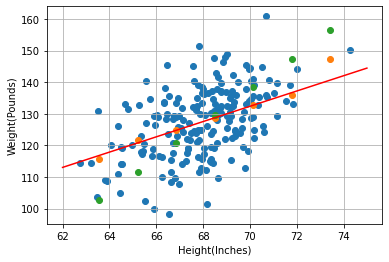

In [15]:
t = np.arange(62.0, 75.0, 0.01)
s = t * b + a

h_intervals_mean = []
h_mean_intervals = []
i = 0
for interval in cut_H.drop_duplicates().sort_values():
    h_intervals_mean.append(interval.mid)
    h_mean_intervals.append(sum(conditional_mean_H.iloc[i, :]) / sum(CorrTable_df.iloc[i, :]))
    i += 1
    
w_intervals_mean = []
w_mean_intervals = []
i = 0
for interval in cut_W.drop_duplicates().sort_values():
    w_intervals_mean.append(interval.mid)
    w_mean_intervals.append(sum(conditional_mean_W.iloc[i, :]) / sum(CorrTable_df.iloc[i, :]))
    i += 1
    

fig, ax = plt.subplots()
ax.plot(t, s, color='red')
ax.scatter(xs, ys)
ax.scatter(h_intervals_mean, w_mean_intervals)
ax.scatter(h_mean_intervals, w_intervals_mean)
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
ax.grid()

plt.show()          

### Parameters and coefficients

In [16]:
table = pd.DataFrame({'H mean': h_intervals_mean, 
                      'W': np.array(h_intervals_mean) * b + a, 
                      'W mean': w_mean_intervals,
                      'E': (np.array(h_intervals_mean) * b + a) - w_mean_intervals})
table

,H mean,W,W mean,E
0,63.5660,116.814695,115.682833,1.131862
1,65.2145,120.804000,121.766562,-0.962563
2,66.8570,124.778784,124.733620,0.045165
3,68.4995,128.753569,128.547656,0.205913
4,70.1425,132.729564,132.821333,-0.091770
5,71.7850,136.704348,135.978714,0.725634
6,73.4275,140.679133,147.473000,-6.793867


In [17]:
n = []
for i in range(7):
    n.append(sum(CorrTable_df.iloc[i, :]))
table['n'] = n
table['E*n'] = table['E'] * n
table['E^2*n'] = (table['E'] ** 2) * n
table['W*n'] = table['W'] * n
table['W^2*n'] = np.round((table['W'] ** 2) * n, 2)
table

,H mean,W,W mean,E,n,E*n,E^2*n,W*n,W^2*n
0,63.5660,116.814695,115.682833,1.131862,9,10.186756,11.530001,1051.332256,122811.06
1,65.2145,120.804000,121.766562,-0.962563,24,-23.101509,22.236656,2899.295991,350246.55
2,66.8570,124.778784,124.733620,0.045165,46,2.077578,0.093833,5739.824078,716208.27
3,68.4995,128.753569,128.547656,0.205913,77,15.855312,3.264817,9914.024812,1276466.08
4,70.1425,132.729564,132.821333,-0.091770,36,-3.303708,0.303180,4778.264292,634216.93
5,71.7850,136.704348,135.978714,0.725634,7,5.079438,3.685814,956.930438,130816.55
6,73.4275,140.679133,147.473000,-6.793867,1,-6.793867,46.156628,140.679133,19790.62


In [18]:
explained_variance = (sum(table['W^2*n']) / 200) - ((sum(table['W*n']) / 200) ** 2)
explained_variance

21.57312291998096

In [19]:
help_table_DE = CorrTable_df.copy()
    
i = 0
for interval in cut_W.drop_duplicates().sort_values():
    help_table_DE.iloc[:, i] *= (interval.mid - table['W'][i])
    i += 1

summ = 0
for value in help_table_DE.sum():
    summ += value
E_mean = summ / 200
    
display(help_table_DE)
print(f"E_mean = {E_mean}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",-14.073195,-45.454998,-4.125784,1.678862,0.000000,0.000000,0.000000
"(64.393, 66.036]",-42.219585,-18.181999,-41.257843,5.876017,11.606873,0.000000,0.000000
"(66.036, 67.678]",-14.073195,-72.727997,-57.760980,14.270327,23.213745,21.537303,0.000000
"(67.678, 69.321]",-14.073195,-90.909996,-66.012549,20.985775,116.068727,53.843258,0.000000
"(69.321, 70.964]",-0.000000,-9.091000,-37.132059,6.715448,75.444672,43.074607,15.733867
"(70.964, 72.606]",-0.000000,-0.000000,-0.000000,2.518293,17.410309,10.768652,0.000000
"(72.606, 74.249]",-0.000000,-0.000000,-0.000000,0.000000,0.000000,10.768652,0.000000


E_mean = -0.3778949407583309


In [20]:
help_table_DE_2 = CorrTable_df.copy()
    
i = 0
for interval in cut_W.drop_duplicates().sort_values():
    help_table_DE_2.iloc[:, i] *= (interval.mid - table['W'][i]) ** 2
    i += 1

summ = 0
for value in help_table_DE_2.sum():
    summ += value
E_2_mean = summ / 200
DE = E_2_mean - (E_mean ** 2)
    
display(help_table_DE_2)
print(f"E^2_mean = {E_2_mean}")
print(f"DE = {DE}")

cut_W,"(98.24, 107.243]","(107.243, 116.183]","(116.183, 125.123]","(125.123, 134.063]","(134.063, 143.003]","(143.003, 151.943]","(151.943, 160.883]"
cut_H,,,,,,,
"(62.739, 64.393]",198.054822,413.231369,17.022096,1.409289,0.000000,0.000000,0.00000
"(64.393, 66.036]",594.164466,165.292548,170.220961,4.932511,67.359747,0.000000,0.00000
"(66.036, 67.678]",198.054822,661.170191,238.309345,11.978955,134.719493,231.927717,0.00000
"(67.678, 69.321]",198.054822,826.462739,272.353537,17.616111,673.597467,579.819292,0.00000
"(69.321, 70.964]",0.000000,82.646274,153.198865,5.637155,437.838354,463.855434,247.55457
"(70.964, 72.606]",0.000000,0.000000,0.000000,2.113933,101.039620,115.963858,0.00000
"(72.606, 74.249]",0.000000,0.000000,0.000000,0.000000,0.000000,115.963858,0.00000


E^2_mean = 37.007821106463055
DE = 36.865016520212315


In [21]:
print(f"F-stat = {scipy.stats.f.ppf(0.95, 6, 200-7)}")
print(f"determination coefficient = {explained_variance / DW}")
print(f"regression standard error = {(200 / 198) * DE}")
print(f"a standard error = {H_mean * ((200 / 198) * DE) / ((200 * DH) ** (1/2))}")
print(f"b standard error = {DE / ((200 * DH) ** (1/2))}")

F-stat = 2.145801467670299
determination coefficient = 0.18048236777190327
regression standard error = 37.23739042445688
a standard error = 93.20669361366713
b standard error = 1.3581604049863116


In [22]:
prediction = 79 * b + a
print(f"Weigth prediction (Heigth = 79 inches): {prediction}")

Weigth prediction (Heigth = 79 inches): 154.1643614600814


### Statsmodel

In [43]:
model = sm.OLS(ys, xs).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          3.484e+04
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                   2.05e-225
Time:                        12:40:56   Log-Likelihood:                         -737.12
No. Observations:                 200   AIC:                                      1476.
Df Residuals:                     199   BIC:                                      1480.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [47]:
print(f"Model weigth prediction (Heigth = 79 inches): {model.predict(79)[0]}")

Model weigth prediction (Heigth = 79 inches): 148.41671545633426
